In [1]:
import os, sys, time
from scipy import stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
%matplotlib inline

from IPython.display import display, HTML

if (sys.version_info < (3, 0)):
    HTML('''<script>
    code_show=true; 
    function code_toggle() {
     if (code_show){
     $('div.input').hide();
     } else {
     $('div.input').show();
     }
     code_show = !code_show
    } 
    $( document ).ready(code_toggle);
    </script>
    <form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
# Create timestamp to show when this summary was run
print('Summary run: ' + time.strftime("%a, %d %b %Y %H:%M"))

Summary run: Thu, 14 Nov 2024 11:32


In [3]:
relative_path = '../../../../outputs'
pd.options.display.float_format = '{:0,.0f}'.format
format_percent = "{:,.2%}".format

# Traffic Counts
----
### Daily | By Facility Type

In [4]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume.csv'))
df[['modeled','observed']] = df[['modeled','observed']].astype('float')

In [5]:
_df = df.groupby('@facilitytype').sum()[['observed','modeled']]
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df

,observed,modeled,diff,percent_diff
@facilitytype,,,,
Arterial,"13,060,004","13,938,278","878,274",6.72%
Collector,"72,096","77,278","5,182",7.19%
Freeway,"46,455,221","44,433,614","-2,021,607",-4.35%
HOV,"246,053","278,147","32,094",13.04%
Ramp,"334,132","259,006","-75,126",-22.48%
Total,"60,167,506","58,986,323","-1,181,183",-1.96%


----
### Daily | By County

In [6]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume_county_facility.csv'))
df[['modeled','observed']] = df[['modeled','observed']].astype('float')

_df = df.groupby('county').sum()[['observed','modeled']]
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df

,observed,modeled,diff,percent_diff
county,,,,
King,"32,134,146","32,934,499","800,353",2.49%
Kitsap,"3,636,120","2,838,131","-797,989",-21.95%
Pierce,"12,521,558","11,913,041","-608,517",-4.86%
Snohomish,"11,875,682","11,300,652","-575,030",-4.84%
Total,"60,167,506","58,986,323","-1,181,183",-1.96%


----
### Daily | Scatterplots 

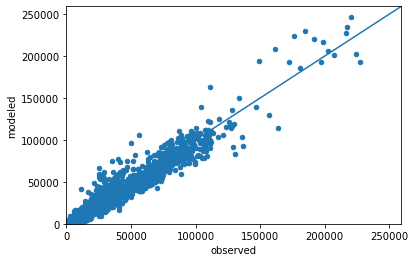

In [7]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume.csv'))
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)

In [8]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print('r^2: ' + str(r_value))

r^2: 0.9566759614430503


---
By County

King r^2: 0.9611936130003326
Kitsap r^2: 0.9690664782118945
Pierce r^2: 0.9589349430746898
Snohomish r^2: 0.937754476540925


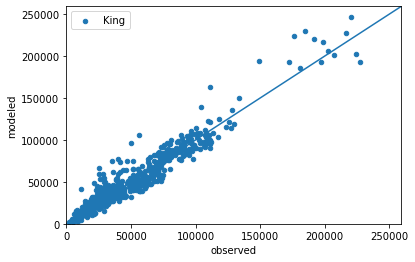

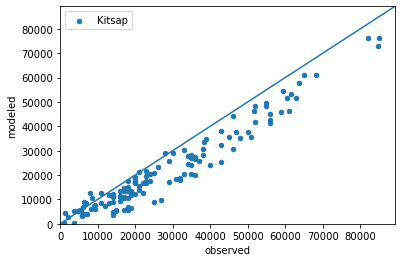

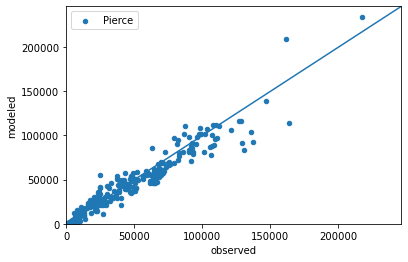

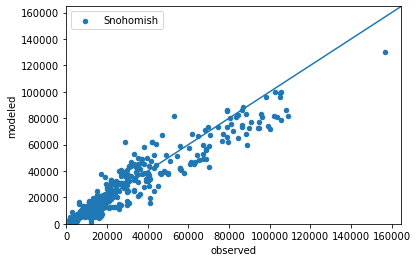

In [9]:
for county in np.unique(df['county']):
    _df = df[df['county'] == county]
    ax = _df.plot(kind='scatter', x='observed', y='modeled', label=county)
    lim = _df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    print(str(county) + ' r^2: ' + str(r_value))

---
By Facility Type

r^2 Freeway: 0.9471896222381098


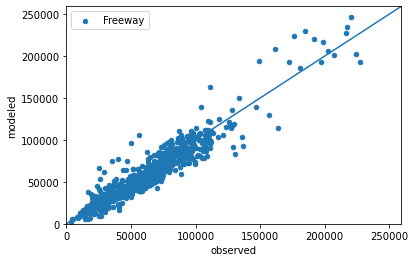

In [10]:
for factype in ['Freeway']:
    _df = df[df['@facilitytype'] == factype]
    ax = _df.plot(kind='scatter', x='observed', y='modeled', label=factype)
    lim = _df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
    print('r^2 ' + str(factype) + ': ' + str(r_value))

**Hourly Volumes**


r^2: 0.629821081461926


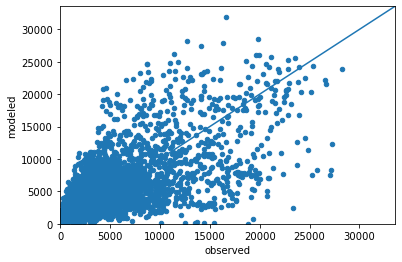

In [11]:
df = pd.read_csv(os.path.join(relative_path,'validation','hourly_volume.csv'))
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print('r^2: ' + str(r_value))

# Screenlines

In [12]:
df = pd.read_csv(os.path.join(relative_path,'validation','screenlines.csv'))
df = df.append(df.sum(numeric_only=True), ignore_index=True)
df.at[df.index[-1], 'name'] = 'TOTAL'
#df.at['C', 'name'] = 10
df['percent_diff'] = df['diff']/df['observed']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,name,observed,modeled,county,diff,percent_diff
0,AUBURN - SOUTH KING,"592,476","520,669",King,"-71,807",-12.12%
1,KENT,"559,335","483,749",King,"-75,586",-13.51%
2,SHIP CANAL,"480,070","516,638",King,"36,568",7.62%
3,SEATTLE - SOUTH OF CBD,"473,322","485,037",King,"11,715",2.48%
4,MILL CREEK,"391,447","381,322",King,"-10,125",-2.59%
5,SOUTH BELLEVUE,"389,700","367,159",King,"-22,541",-5.78%
6,KIRKLAND-REDMOND,"381,663","385,355",King,"3,692",0.97%
7,SEATTLE - NORTH,"356,051","354,768",King,"-1,283",-0.36%
8,TACOMA - EAST OF CBD,"324,463","340,459",Pierce,"15,996",4.93%
9,PARKLAND,"299,722","278,437",Pierce,"-21,285",-7.10%


r^2 : 0.9835706734957919


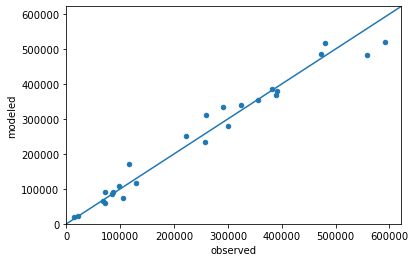

In [13]:
df = df.head(-1)
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print('r^2 : ' + str(r_value))

# Transit Boarding
----
### By Agency

In [14]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_by_agency.csv')

df[['observed_boardings','model_boardings','diff']] = df[['observed_boardings','model_boardings','diff']].astype('float')
df[['perc_diff']] = df[['perc_diff']].applymap(format_percent)
df.sort_values('observed_boardings', ascending=False)

,agency,observed_boardings,model_boardings,diff,perc_diff
2,King County Metro,"253,314","338,485","85,172",33.62%
5,Sound Transit,"113,374","130,893","17,519",15.45%
0,Community Transit,"25,962","23,673","-2,289",-8.82%
4,Pierce Transit,"21,185","17,491","-3,694",-17.44%
6,Washington Ferries,"9,278","8,085","-1,193",-12.86%
3,Kitsap Transit,"8,258","16,540","8,282",100.29%
1,Everett Transit,"4,201","2,723","-1,478",-35.18%


----
### Key Routes
#### Ferries

In [15]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_key_routes.csv', index_col='description')
df[['observed_boardings','model_boardings']] = df[['observed_boardings','model_boardings']].astype('float')
_df = df[df['route_code'].isin([5001,5002,5003,5004,5005,5006,5007,1973,1975])].reset_index()
_df.drop(['route_code','agency'], axis=1, inplace=True)
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)
_df

,description,observed_boardings,model_boardings,diff,perc_diff
0,973 W Sea Water Taxi,759,378,-381,-50.22%
1,975 Vashn Water Taxi,338,518,180,53.28%
2,WSF Edmonds-Kingston,"1,500",231,"-1,269",-84.57%
3,WSF Seattle-Bain Isl,"5,514","5,846",332,6.02%
4,WSF Seattle-Brem,"1,189",236,-953,-80.17%
5,WSF Fauntleroy-Swrth,143,606,463,325.02%
6,WSF Fauntleroy-Vashn,560,833,273,48.78%
7,WSF Vashon-Southwrth,108,131,24,21.88%
8,WSF Pt Def-Tahlequah,265,202,-63,-23.83%


r^2 : 0.9448891178674416


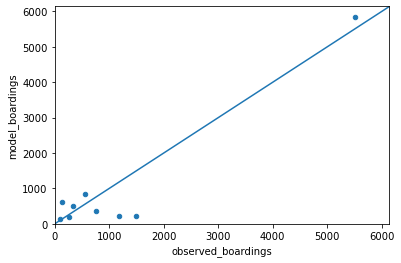

In [16]:
if len(_df) > 0:
    ax = _df.plot(kind='scatter', x='observed_boardings', y='model_boardings')
    lim = _df[['observed_boardings','model_boardings']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_boardings'],_df['model_boardings'])
    print('r^2 ' + str('') + ': ' + str(r_value))

#### Bikes on Ferries

In [17]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'bike_ferry_boardings.csv')
df['route_code'] = df['route_code'].astype('int')
df[['route_code','description', '@bvol']].sort_values('@bvol', ascending=False)

,route_code,description,@bvol
4,4202,Brem-Annapolis FF,545
2,4200,Seattle-Bremerton FF,473
0,1973,973 W Sea Water Taxi,420
3,4201,Brem-Pt Orchard FF,402
5,4203,Seattle-Kingston FF,226
1,1975,975 Vashn Water Taxi,214
11,5005,WSF Fauntleroy-Vashn,206
12,5007,WSF Pt Def-Tahlequah,119
8,5002,WSF Seattle-Bain Isl,117
10,5004,WSF Fauntleroy-Swrth,49


#### Rail

In [18]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_key_routes.csv', index_col='description')
df[['observed_boardings','model_boardings']] = df[['observed_boardings','model_boardings']].astype('float')
_df = df[df['route_code'].isin([6996,6999,6998])].reset_index()
_df['description'] = _df['route_code'].map({6998: 'Sounder South', 6999: 'Sounder North',6996: 'Link Red Line'})
_df.drop(['route_code','agency'], axis=1, inplace=True)
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)

_df

,description,observed_boardings,model_boardings,diff,perc_diff
0,Link Red Line,"79,522","64,788","-14,734",-18.53%
1,Sounder South,"6,038","8,643","2,605",43.14%
2,Sounder North,316,8,-308,-97.62%


r^2 : 0.9983044812080167


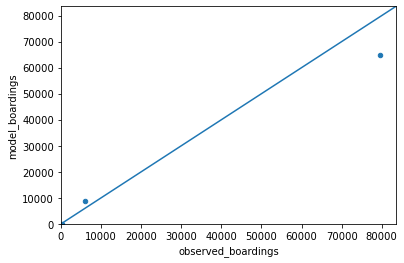

In [19]:
if len(_df) > 0: 
    ax = _df.plot(kind='scatter', x='observed_boardings', y='model_boardings')
    lim = _df[['observed_boardings','model_boardings']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_boardings'],_df['model_boardings'])
    print('r^2 ' + str('') + ': ' + str(r_value))

#### RapidRide, Busiest Buses, Streetcar

In [20]:
_df = df[df['route_code'].isin([1671,1672,1673,1674,1675,1676,6550,1007,1040,1997,1998])].reset_index()
_df['description'] = _df['route_code'].map({1671: 'A Line RapidRide', 1672: 'B Line RapidRide',
                                            1673: 'C Line RapidRide', 1674: 'D Line RapidRide',
                                            1675: 'E Line RapidRide', 1676: 'F Line RapidRide',
                                            6550: 'Sound Transit 550', 1040: 'KC Metro 40', 1007: 'KC Metro 7',
                                            1997: 'SLU Streetcar', 1998: 'First Hill Streetcar'})
_df.drop(['route_code','agency'], axis=1, inplace=True)
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)
_df.sort_values('model_boardings', ascending=False)

,description,observed_boardings,model_boardings,diff,perc_diff
6,E Line RapidRide,"11,426","17,861","6,435",56.31%
4,C Line RapidRide,"7,250","13,156","5,906",81.46%
0,KC Metro 7,"9,954","12,604","2,650",26.62%
1,KC Metro 40,"7,208","11,635","4,427",61.42%
5,D Line RapidRide,"9,044","10,032",988,10.93%
10,Sound Transit 550,"3,351","9,427","6,076",181.31%
2,A Line RapidRide,"8,412","7,197","-1,215",-14.44%
7,F Line RapidRide,"4,748","6,221","1,473",31.02%
3,B Line RapidRide,"4,177","4,242",65,1.56%
9,First Hill Streetcar,"3,900","1,702","-2,199",-56.38%


r^2 : 0.8322690169735353


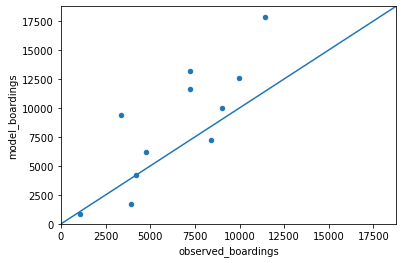

In [21]:
if len(_df) > 0: 
    ax = _df.plot(kind='scatter', x='observed_boardings', y='model_boardings')
    lim = _df[['observed_boardings','model_boardings']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_boardings'],_df['model_boardings'])
    print('r^2 ' + str('') + ': ' + str(r_value))

---
### Lines by Agency

r^2 Community Transit: 0.9276436697742224
r^2 Everett Transit: 0.9778822822621337


r^2 King County Metro: 0.9338700242247481
r^2 Kitsap Transit: 0.9293450611191234
r^2 Pierce Transit: 0.7421755656106623
r^2 Sound Transit: 0.9883194590253195
r^2 Washington Ferries: 0.946708589710863


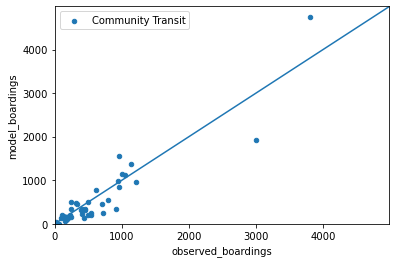

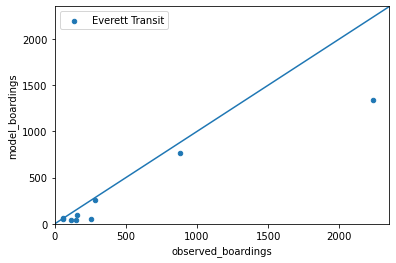

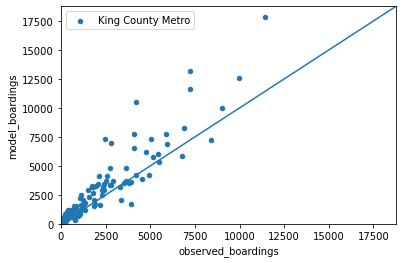

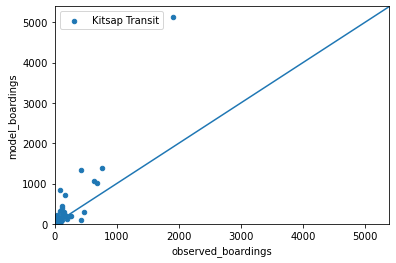

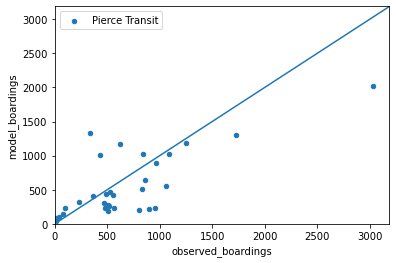

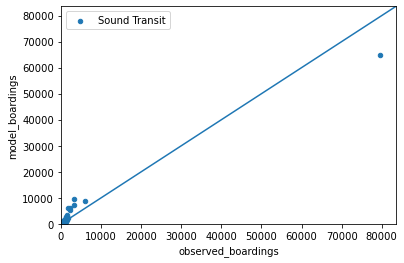

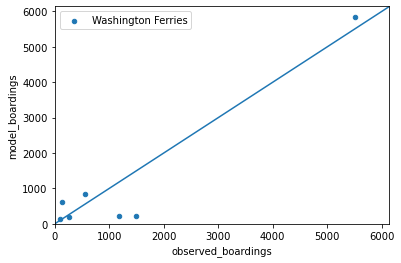

In [22]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_by_line.csv', index_col='agency')
df = df[-df['agency_id'].isnull()]

for agency in np.unique(df.index):
    _df = df.loc[agency,:]
    if (type(_df) == pd.core.frame.DataFrame) & (len(df) > 0):
        ax = _df.plot(kind='scatter', x='observed_boardings', y='model_boardings', label=agency)
        lim = _df[['observed_boardings','model_boardings']].max().max()*1.05
        ax.set_ylim(0,lim)
        ax.set_xlim(0,lim)
        x = np.linspace(*ax.get_xlim())
        ax.plot(x, x)
        slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_boardings'],_df['model_boardings'])
        print('r^2 ' + str(agency) + ': ' + str(r_value))

# Light Rail Station Boardings
----
Red Line

In [23]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'light_rail_boardings.csv', index_col='station_name')
df['diff'] = df['model_boardings']-df['observed_boardings']
df['percent_diff'] = df['diff']/df['observed_boardings']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,observed_boardings,model_boardings,diff,percent_diff
station_name,,,,
Husky Stadium,"6,134","3,574","-2,560",-41.74%
Westlake,"8,845","7,150","-1,695",-19.17%
University St,"4,324","4,920",596,13.78%
Pioneer Square,"2,400","4,660","2,260",94.17%
Int'l District,"4,399","1,641","-2,758",-62.69%
Capitol Hill,"7,667","5,345","-2,322",-30.29%
Stadium,"1,731",248,"-1,483",-85.66%
SODO,"1,669","1,857",188,11.28%
Beacon Hill,"2,147",898,"-1,249",-58.18%


Sound Transit Station Groupings

In [24]:
df_combined = df.copy()

df_combined['station_group'] = df.index
df_combined.loc[['Westlake'],'station_group'] = 'Westlake/University St'
df_combined.loc[['University St'],'station_group'] = 'Westlake/University St'

df_combined.loc[['Pioneer Square'],'station_group'] = "Pioneer Square/Int'l District"
df_combined.loc[["Int'l District"],'station_group'] = "Pioneer Square/Int'l District"

df_combined.loc[['Stadium'],'station_group'] = 'Stadium/SODO'
df_combined.loc[['SODO'],'station_group'] = 'Stadium/SODO'

df_combined.loc[['Beacon Hill'],'station_group'] = 'Beacon Hill/Mount Baker'
df_combined.loc[['Mount Baker'],'station_group'] = 'Beacon Hill/Mount Baker'

df_combined.loc[['Othello'],'station_group'] = 'Othello/Rainier Beach'
df_combined.loc[['Rainier Beach'],'station_group'] = 'Othello/Rainier Beach'

df_combined = df_combined.groupby('station_group').sum()[['observed_boardings','model_boardings']]
df_combined['diff'] = df_combined['model_boardings']-df_combined['observed_boardings']
df_combined['percent_diff'] = df_combined['diff']/df_combined['observed_boardings']
df_combined[['percent_diff']] = df_combined[['percent_diff']].applymap(format_percent)

df_combined.loc[['Husky Stadium','Capitol Hill','Westlake/University St',"Pioneer Square/Int'l District",
                 'Stadium/SODO','Beacon Hill/Mount Baker','Columbia City','Othello/Rainier Beach',
                "Tukwila Int'l Blvd",'SeaTac/Airport','Angle Lake']]

,observed_boardings,model_boardings,diff,percent_diff
station_group,,,,
Husky Stadium,"6,134","3,574","-2,560",-41.74%
Capitol Hill,"7,667","5,345","-2,322",-30.29%
Westlake/University St,"13,169","12,069","-1,100",-8.35%
Pioneer Square/Int'l District,"6,799","6,301",-498,-7.32%
Stadium/SODO,"3,400","2,105","-1,295",-38.07%
Beacon Hill/Mount Baker,"4,008","2,109","-1,899",-47.38%
Columbia City,"1,630","1,068",-562,-34.45%
Othello/Rainier Beach,"3,525","2,360","-1,165",-33.06%
Tukwila Int'l Blvd,"2,298","1,773",-525,-22.83%


# Stop Transfers

### Light Rail

In [25]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'light_rail_transfers.csv', index_col='station_name')
pd.options.display.float_format = '{:0,.2f}'.format
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,modeled_transfer_rate,observed_transfer_rate,diff,percent_diff
station_name,,,,
Husky Stadium,0.88,-99.00,99.88,-100.89%
Westlake,0.17,0.36,-0.19,-53.30%
University St,0.28,0.20,0.08,40.01%
Pioneer Square,0.46,0.16,0.30,191.17%
Int'l District,0.60,0.45,0.15,32.89%
Capitol Hill,0.07,-99.00,99.07,-100.07%
Stadium,0.43,0.12,0.31,262.52%
SODO,0.63,0.31,0.32,102.17%
Beacon Hill,0.44,0.35,0.08,23.73%


# Externals

In [26]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'external_volumes.csv', index_col='location')

pd.options.display.float_format = '{:0,.0f}'.format
df = df.drop('diff', axis=1)
df['diff'] = df['modeled']-df['observed']
df = df.fillna(0)
df.loc['Total',['observed','modeled','diff']] = df[['observed','modeled','diff']].sum()
df['percent_diff'] = df['diff']/df['observed']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)

df[['external_station']] = df[['external_station']].applymap('{:0.0f}'.format)
df.replace('nan', '', regex=True)

,external_station,county,observed,modeled,diff,percent_diff
location,,,,,,
I-5 to Olympia,3733,Pierce,"132,000","91,793","-40,207",-30.46%
I-5 to Mount Vernon,3744,Snohomish,"64,400","48,003","-16,397",-25.46%
I-90 @ Snoqualmie Pass,3739,King,"33,800","30,737","-3,063",-9.06%
SR-507 to Yelm,3734,Pierce,"21,800","15,064","-6,736",-30.90%
SR-532 to Camano Island,3746,Snohomish,"20,700","15,013","-5,687",-27.47%
SR-3 to Belfair,3749,Kitsap,"18,400","5,685","-12,715",-69.10%
Hood Canal Bridge,3748,Kitsap,"17,600","13,333","-4,267",-24.24%
SR-530 N/O Stanwood,3745,Snohomish,"9,100","5,185","-3,915",-43.03%
Mukilteo-Clinton Ferry,3747,Snohomish,"6,050","5,935",-115,-1.89%


# Corridor Speed

<AxesSubplot:xlabel='observed_speed', ylabel='model_speed'>

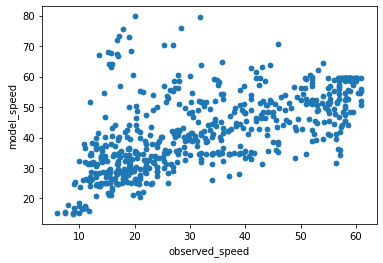

In [27]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'corridor_speeds.csv')
df.plot(kind='scatter', y='model_speed', x='observed_speed')

### AM Peak, Primary Corridors

<AxesSubplot:xlabel='observed_speed', ylabel='model_speed'>

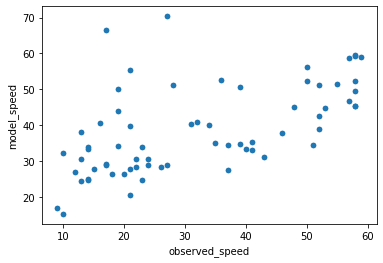

In [28]:
df[df['tod'] == '7to8'].plot(kind='scatter', x='observed_speed', y='model_speed')

In [29]:
# Show daily AM and PM peaks by corridor
df[df['tod'] == '7to8'][['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
6,Seattle to Everett - NB,45,58
15,Everett to Seattle - SB,29,27
24,Tacoma to Seattle - NB,29,24
33,Seattle to Tacoma - SB,45,58
42,Bellevue to Lynnwood - NB,47,57
51,Lynnwood to Bellevue - SB,28,22
60,Tukwila to Bellevue - NB,26,20
69,Bellevue to Tukwila - SB,31,43
78,Auburn to Renton - NB,31,22
87,Renton to Auburn - SB,51,55


### PM Peak, Primary Corridors

<AxesSubplot:xlabel='observed_speed', ylabel='model_speed'>

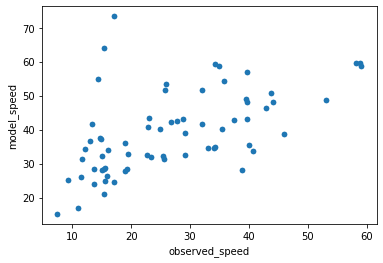

In [30]:
df[df['tod'] == '16to17'].plot(kind='scatter', x='observed_speed', y='model_speed')

In [31]:
df[df['tod'] == '16to17'][['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
1,Seattle to Everett - NB,32,23
10,Everett to Seattle - SB,43,28
19,Tacoma to Seattle - NB,46,43
28,Seattle to Tacoma - SB,32,25
37,Bellevue to Lynnwood - NB,31,26
46,Lynnwood to Bellevue - SB,43,40
55,Tukwila to Bellevue - NB,33,29
64,Bellevue to Tukwila - SB,28,19
73,Auburn to Renton - NB,51,44
82,Renton to Auburn - SB,35,34
